<a href="https://colab.research.google.com/github/svanalex/HaikusFromPaintings/blob/main/SelfEvalToolsV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Basic syllable counter

In [ ]:
import re

In [ ]:
#building a better syllable counter
import nltk
nltk.download('cmudict')
from nltk.corpus import cmudict
d = cmudict.dict()

[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


In [ ]:
import nltk
from nltk.corpus import cmudict

# Load the CMU Pronouncing Dictionary
nltk.download('cmudict')
cmu_dict = cmudict.dict()

def estimate_syllables(word):
    word = word.lower()
    count = 0
    vowels = "aeiouy"
    if word and word[0] in vowels:
        count += 1
    for i in range(1, len(word)):
        if word[i] in vowels and word[i - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

def syllable_count(word):
    word = word.lower()
    if word in cmu_dict:
        # Take the first pronunciation
        pronunciation = cmu_dict[word][0]
        syllables = len([ph for ph in pronunciation if ph[-1].isdigit()])
        return syllables
    else:
        return estimate_syllables(word)


[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [ ]:
def preprocess(sentence):
  sentence = re.sub('[^A-Za-z0-9 ]+', '', sentence)
  return sentence

In [ ]:
def line_counter(sentence):
  #need to make words from sentences
  sentence = preprocess(sentence)
  #print(sentence)
  sentence_syllables = 0
  words = sentence.split()
  for word in words:
    #print(word, syllable_count(word))
    sentence_syllables += syllable_count(word)
    #sentence_syllables += count_syllables(word)
  return sentence_syllables

##Checking for haikus using syllable counter?

In [ ]:
def syll_sentence(sentence):
  syll_line = []
  for line in sentence.split("\n"):
    print(line_counter(line))
    syll_line.append((line_counter(line), line))
  return syll_line

In [ ]:
def extract_flexible_haikus(syll_lines):
    haikus = []

    for i in range(1, len(syll_lines) - 1):
        prev_syll, prev_line = syll_lines[i - 1]
        curr_syll, curr_line = syll_lines[i]
        next_syll, next_line = syll_lines[i + 1]

        if 4 <= prev_syll <= 6 and 6 <= curr_syll <= 8 and 4 <= next_syll <= 6:
            haikus.append((f"{prev_line}\n{curr_line}\n{next_line}", [prev_syll, curr_syll, next_syll]))
            break
    return haikus if haikus else [("no/improper haiku", [0,0,0])]

In [ ]:
def score_haiku(haiku):
  score = sum([x-y for x,y in zip([5,7,5], haiku[1])])
  return score

In [ ]:
test_sentence = ".\n Here's the haiku:\nMoonlight whispers\nSilent brush strokes paint\nDreaming midnight blue\nThis haiku captures the essence of the painting's mood and style"
#test_sentence = ""
sen = syll_sentence(test_sentence)
haiku = extract_flexible_haikus(sen)
print(haiku)
print(haiku[0][0])
print(score_haiku(haiku[0]))

0
5
4
5
5
15
[('no/improper haiku', [0, 0, 0])]
no/improper haiku
17


##Llama from hugging face as an eval tool

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3-8B")
model = AutoModelForCausalLM.from_pretrained("meta-llama/Meta-Llama-3-8B")

#tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-chat-hf")
#model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-chat-hf")

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/177 [00:00<?, ?B/s]

In [ ]:
#text = f"How would you rate this haiku on a scale from 1-10?: {haiku[0][0]}"
text = [f"I need to grade this haiku for syllable count on a scale from 1-5. Treat this as a college level assignment and judge the quality appropriately: {haiku[0][0]}",
        f"I need to grade this haiku for its relation to nature on a scale from 1-5. Treat this as a college level assignment and judge the quality appropriately: {haiku[0][0]}",
        f"I need to grade this haiku for the quality of the creativity on a scale from 1-5. Treat this as a college level assignment and judge the quality appropriately: {haiku[0][0]}",
        f"I need to grade this haiku for the imagery contained within it on a scale from 1-5. Treat this as a college level assignment and judge the quality appropriately: {haiku[0][0]}"
        ]


for line in text:
  inputs = tokenizer(line, return_tensors="pt")
  outputs = model.generate(**inputs, max_new_tokens=80)
  print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


I need to grade this haiku for syllable count on a scale from 1-5. Treat this as a college level assignment and judge the quality appropriately: no/improper haiku are not allowed. If you are not sure, please ask.
I am not sure if this is a haiku or not. If it is, it is a 5/7/5 haiku. If not, please explain why it is not a haiku and what would make it a haiku.
I am not sure if this is a haiku or not. If it is,


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


I need to grade this haiku for its relation to nature on a scale from 1-5. Treat this as a college level assignment and judge the quality appropriately: no/improper haiku, no/insufficient nature, 1/1, 2/2, 3/3, 4/4, 5/5. I will be looking for the use of all three lines and how they relate to each other, the use of a seasonal reference, and the use of a reference to nature. The haiku must have all three elements to get a 5


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


I need to grade this haiku for the quality of the creativity on a scale from 1-5. Treat this as a college level assignment and judge the quality appropriately: no/improper haiku, 1; good haiku, 5. Please answer this in a sentence or two.
I need to grade this haiku for the quality of the creativity on a scale from 1-5. Treat this as a college level assignment and judge the quality appropriately: no/improper haiku, 1; good haiku, 5. Please answer this in a sentence or two.
I need to grade this haiku for the imagery contained within it on a scale from 1-5. Treat this as a college level assignment and judge the quality appropriately: no/improper haiku, 1; poor, 2; fair, 3; good, 4; excellent, 5.
The haiku must have the following elements:
- the imagery must be clear and the haiku must be a "haiku" in the traditional sense (i.e. 5/7/5 syllables)
- the haiku must contain a metaphor
- the haiku


##BLIP as a self evaluation mechanism

In [ ]:
from PIL import Image
import requests
from transformers import AutoProcessor, BlipForImageTextRetrieval

model = BlipForImageTextRetrieval.from_pretrained("Salesforce/blip-itm-base-coco")
processor = AutoProcessor.from_pretrained("Salesforce/blip-itm-base-coco")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
text = "an image of a dog"

inputs = processor(images=image, text=text, return_tensors="pt")
outputs = model(**inputs)

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/895M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/895M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/456 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
#Sampled several HAIKU outputs for evaluation of iamge-haiku pairs. Have decided this is not an appropriate path forwards given incredibly low accuracy
image = Image.open("/content/ce8b9ee46fa699101c2d31f2b4a9622e.jpg")
#text = "painting of the moon and stars with a cityscape background"
#text = "Golden dusk unfolds Shadows climb the quiet hills Night hums soft and slow" #0.001
#text = "Black church towers rise Moonlight bleeds across the sky Sorrow echoes" #0.222
#text = "A church stands stark Where moonlight bleeds soft shadows Silence whispers" #0.002
text = "Lonely church stands tall Nocturnal shadows embrace Silence surrounds all" #0.001
text = "Stark shadows drift Lights glimmer through bare branches Silence whispers cold" #0.000
text = "Cherry tree's shadows Lights flicker between branches Silence whispers" #0.000


In [ ]:
from transformers import BlipProcessor, BlipForImageTextRetrieval
import torch

# choose the ITM‑fine‑tuned checkpoint
checkpoint = "Salesforce/blip-itm-base-coco"
processor  = BlipProcessor.from_pretrained(checkpoint)
model      = BlipForImageTextRetrieval.from_pretrained(checkpoint)

# prepare your single image + single text
inputs = processor(images=image, text=text, return_tensors="pt")

# forward pass: itm_logits has shape [1, 2]
itm_out = model(**inputs)
itm_logits = itm_out.itm_score

# turn into probabilities [P(no‑match), P(match)]
probs = itm_logits.softmax(dim=-1)

match_prob = probs[0, 1].item()
print(f"P(image matches text) = {match_prob:.3f}")



P(image matches text) = 0.000


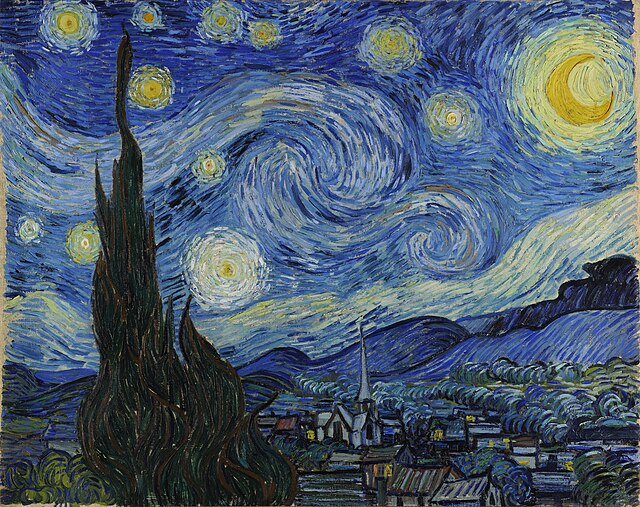

In [ ]:
image

##Trying other stuff with BLIP


In [ ]:
!pip install --upgrade transformers

In [ ]:
!pip install --upgrade numpy scipy

In [ ]:
#!pip install "transformers==4.38.2" "numpy==1.23.5"

!pip install numpy==1.25.2 transformers==4.51.3


In [ ]:
import torch
from PIL import Image
import requests
from transformers import AutoProcessor, Blip2ForImageTextRetrieval

device = "cuda" if torch.cuda.is_available() else "cpu"

model = Blip2ForImageTextRetrieval.from_pretrained("Salesforce/blip2-itm-vit-g")
processor = AutoProcessor.from_pretrained("Salesforce/blip2-itm-vit-g")

model.to(device)
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open("/content/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg")
text = "Lonely church stands tall Nocturnal shadows embrace Silence surrounds all"

inputs = processor(images=image, text=text, return_tensors="pt").to(device)
itm_out = model(**inputs, use_image_text_matching_head=True)
logits_per_image = torch.nn.functional.softmax(itm_out.logits_per_image, dim=1)
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

print(f"{probs[0][0]:.1%} that image 0 is not '{text}'")
print(f"{probs[0][1]:.1%} that image 0 is '{text}'")

config.json:   0%|          | 0.00/554 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.69G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/263 [00:00<?, ?B/s]

Expanding inputs for image tokens in BLIP-2 should be done in processing. Please follow instruction here (https://gist.github.com/zucchini-nlp/e9f20b054fa322f84ac9311d9ab67042) to update your BLIP-2 model. Using processors without these attributes in the config is deprecated and will throw an error in v4.50.


73.1% that image 0 is not 'Lonely church stands tall Nocturnal shadows embrace Silence surrounds all'
26.9% that image 0 is 'Lonely church stands tall Nocturnal shadows embrace Silence surrounds all'


Note: nearly all haiku outputs are graded at ~26.9% accuracy. I have deemed that BLIP is fully inappropriate for this context due to this (at least given zero shot learning)

##Llama to text multiple haikus
basically filtering 5 haikus to see if Llama can pick out a favorite/best haiku

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
#Llama-4
#Note, this block remains completely unused as I was unable to get access to Llama 4
from transformers import AutoProcessor, Llama4ForConditionalGeneration
import torch

model_id = "meta-llama/Llama-4-Scout-17B-16E-Instruct"

processor = AutoProcessor.from_pretrained(model_id)
model = Llama4ForConditionalGeneration.from_pretrained(
    model_id,
    attn_implementation="flex_attention",
    device_map="auto",
    torch_dtype=torch.bfloat16,
)

url1 = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/0052a70beed5bf71b92610a43a52df6d286cd5f3/diffusers/rabbit.jpg"
url2 = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/datasets/cat_style_layout.png"
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "url": url1},
            {"type": "image", "url": url2},
            {"type": "text", "text": "Can you describe how these two images are similar, and how they differ?"},
        ]
    },
]

inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device)

outputs = model.generate(
    **inputs,
    max_new_tokens=256,
)

response = processor.batch_decode(outputs[:, inputs["input_ids"].shape[-1]:])[0]
print(response)
print(outputs[0])

OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Llama-4-Scout-17B-16E-Instruct.
403 Client Error. (Request ID: Root=1-6807d99e-50583c637ae8ec4b483b0a01;06aae610-51b5-4853-8c5f-02b1b32cd84a)

Cannot access gated repo for url https://huggingface.co/meta-llama/Llama-4-Scout-17B-16E-Instruct/resolve/main/config.json.
Your request to access model meta-llama/Llama-4-Scout-17B-16E-Instruct is awaiting a review from the repo authors.

In [ ]:
#text = "painting of the moon and stars with a cityscape background"
#text = "Golden dusk unfolds Shadows climb the quiet hills Night hums soft and slow" #0.001
#text = "Black church towers rise Moonlight bleeds across the sky Sorrow echoes" #0.222
#text = "A church stands stark Where moonlight bleeds soft shadows Silence whispers" #0.002
text = "Lonely church stands tall Nocturnal shadows embrace Silence surrounds all" #0.001
text = "Stark shadows drift Lights glimmer through bare branches Silence whispers cold" #0.000
text = "Cherry tree's shadows Lights flicker between branches Silence whispers" #0.000

In [2]:
#LLama-3 70B
#Model has OOM issues with 15GB of VRAM and 51GB of DRAM
import transformers
import torch

model_id = "meta-llama/Llama-3.3-70B-Instruct"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="auto",
)

messages = [
    {"role": "system", "content": "You are a professional haiku judge at a competition, who is tasked with evaluating three haikus and choosing a winner."},
    {"role": "user", "content": "A church stands stark Where moonlight bleeds soft shadows Silence whispers. Lonely church stands tall Nocturnal shadows embrace Silence surrounds all. Stark shadows drift Lights glimmer through bare branches Silence whispers cold."},
]

outputs = pipeline(
    messages,
    max_new_tokens=256,
)
print(outputs[0]["generated_text"][-1])

Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

Device set to use cpu


KeyboardInterrupt: 

#Okay, working implementation
Llama 3.1-8B-instruct

Powerful model for prompt engineering allowing for the system to be preprompted before a contextual user prompt is provided.

This allows us to directly frame the model as a professional competition judge, and pass along multiple haikus, allowing the model to essentially self evaluate and choose a "best" haiku

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [2]:
!pip install --upgrade transformers accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import BitsAndBytesConfig

import torch

In [4]:
model_id = "meta-llama/Llama-3.1-8B-Instruct"
quantization_config = BitsAndBytesConfig(load_in_8bit=True)

quantized_model = AutoModelForCausalLM.from_pretrained(
    model_id, device_map="auto", torch_dtype=torch.bfloat16, quantization_config=quantization_config)

tokenizer = AutoTokenizer.from_pretrained(model_id)
input_text = "What are we having for dinner?"
input_ids = tokenizer(input_text, return_tensors="pt").to("cuda")

output = quantized_model.generate(**input_ids, max_new_tokens=10)

print(tokenizer.decode(output[0], skip_special_tokens=True))

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
/usr/local/lib/python3.11/dist-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


What are we having for dinner? - 3 Ways to Plan Your Meals
When


In [5]:
#Want some basic evaluation. Capacity of the code to support realtime users is important!
import time

In [6]:
#Basic Evaluation Using Prompt Engineering
t = time.time()
messages = [
    {"role": "system", "content": "You are a professional haiku judge at a competition, who is tasked with evaluating three haikus and choosing a winner."},
    {"role": "user", "content": "A church stands stark Where moonlight bleeds soft shadows Silence whispers. Lonely church stands tall Nocturnal shadows embrace Silence surrounds all. Stark shadows drift Lights glimmer through bare branches Silence whispers cold."},
]

input_ids = tokenizer.encode(messages[1]['content'], return_tensors="pt").to("cuda")

outputs = quantized_model.generate(input_ids, max_new_tokens=128)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))
#print(outputs[0]["generated_text"][-1])
print(f"Time taken {time.time() - t}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


A church stands stark Where moonlight bleeds soft shadows Silence whispers. Lonely church stands tall Nocturnal shadows embrace Silence surrounds all. Stark shadows drift Lights glimmer through bare branches Silence whispers cold. Lonely church stands still Nocturnal shadows dance Silence surrounds all. Stark shadows stand Stillness falls deep Silence whispers cold. Lonely church stands dark Where moonlight fades to black Silence surrounds all. Stark shadows fade Nocturnal shadows sleep Silence whispers cold.
The above poem is written in a style that is reminiscent of the Imagist movement in poetry, which emphasized clear and concise language, precise images, and free verse. The poem's use of short sentences, simple vocabulary, and repetitive structure creates a sense of calm and stillness, mirroring the atmosphere of a lonely church at night. The imagery is vivid and evocative, with the
Time taken 16.810675621032715


In [7]:
#Much more involved prompt engineering done below
t = time.time()
messages2 = [
    {
        "role": "system",
        "content": (
            "You are a professional haiku competition judge. "
            "Your job is to evaluate three haikus based on their poetic quality, emotional impact, imagery, and adherence to the traditional haiku structure. "
            "After evaluating, choose the best haiku and explain your reasoning in 2-3 sentences."
        )
    },
    {
        "role": "user",
        "content": (
            "Here are three haikus:\n\n"
            "1. A church stands stark\n"
            "   Where moonlight bleeds soft shadows\n"
            "   Silence whispers.\n\n"
            "2. Lonely church stands tall\n"
            "   Nocturnal shadows embrace\n"
            "   Silence surrounds all.\n\n"
            "3. Stark shadows drift\n"
            "   Lights glimmer through bare branches\n"
            "   Silence whispers cold.\n\n"
            "Please select the best one and explain why."
        )
    }
]

input_ids2 = tokenizer.encode(messages2[1]['content'], return_tensors="pt").to("cuda")

outputs2 = quantized_model.generate(input_ids2, max_new_tokens=128)

print(tokenizer.decode(outputs2[0], skip_special_tokens=True))
print(f"time taken {time.time() - t}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Here are three haikus:

1. A church stands stark
   Where moonlight bleeds soft shadows
   Silence whispers.

2. Lonely church stands tall
   Nocturnal shadows embrace
   Silence surrounds all.

3. Stark shadows drift
   Lights glimmer through bare branches
   Silence whispers cold.

Please select the best one and explain why. I'm looking for a haiku that evokes a sense of peace and serenity, with a focus on the contrast between the stillness of the church and the movement of the shadows.

The best haiku is:

1. A church stands stark
   Where moonlight bleeds soft shadows
   Silence whispers.

This haiku stands out for several reasons:

* The word "stark" effectively conveys the stillness and emptiness of the church, creating a sense of contrast with the movement of the shadows.
* The phrase "moonlight bleeds soft shadows" is a beautiful and evocative image that suggests a gentle
time taken 16.872941255569458
